INSTALL ALL THE REQUIRED LIBRARIES USING PIP COMMAND

In [2]:
!pip install pandas
!pip install ieugwaspy
!pip install matplotlib
!pip install google_auth_oauthlib
!pip install random
!pip install warnings
!pip install numpy
!pip install scipy
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement random (from versions: none)
ERROR: No matching distribution found for random

[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement warnings (from versions: none)
ERROR: No matching distribution found for warnings

[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


STEP1. Extract instruments for exposure from GWAS using the following command

In [3]:
from extract_instruments import *
exposure = extract_instruments("ieu-a-2")
print (exposure)

    pval.exposure  samplesize.exposure chr.exposure  se.exposure  \
0    2.181980e-08               339152            1       0.0030   
1    4.567730e-11               339065            1       0.0031   
2    5.059410e-14               313621            1       0.0087   
3    5.452050e-10               338768            1       0.0029   
4    1.880180e-28               338123            1       0.0030   
..            ...                  ...          ...          ...   
74   7.910430e-19               312079           19       0.0038   
75   1.594010e-08               234806           19       0.0043   
76   7.787000e-09               334494           19       0.0034   
77   2.138010e-08               339045           20       0.0033   
78   1.604980e-08               337300           21       0.0030   

    beta.exposure  pos.exposure id.exposure         SNP  eaf.exposure  \
0         -0.0168      47684677     ieu-a-2    rs977747        0.5333   
1          0.0201      78048331     i

STEP2. Extract outcome data from GWAS using the following command

In [4]:
from extract_outcome_data import *
outcome_data = extract_outcome_data(snps=exposure["SNP"], outcomes=["ieu-a-7"])
print (outcome_data)

Extracting data for 79 SNP(s) from 1 GWAS(s)
           SNP chr        pos  beta.outcome  se.outcome  samplesize.outcome  \
0     rs977747   1   47684677     -0.013896    0.009615              184305   
1   rs17203016   2  208255518      0.020352    0.012231              184305   
2    rs7550711   1  110082886     -0.048354    0.030564              184305   
3    rs9374842   6  120185665      0.013555    0.010605              184305   
4    rs4740619   9   15634326     -0.006546    0.009250              184305   
..         ...  ..        ...           ...         ...                 ...   
74   rs1516725   3  185824004      0.008179    0.013770              184305   
75   rs1016287   2   59305625     -0.014087    0.010574              184305   
76  rs12286929  11  115022404      0.001802    0.009420              184305   
77   rs2176598  11   43864278     -0.026064    0.011128              184305   
78  rs11672660  19   46180184     -0.038968    0.012559              184305   

    pv

STEP3. Harmonize the data using the following command

In [5]:
from harmonise_data import *
data = harmonise_data(exposure , outcome_data)
print (data)

Harmonising Body mass index || id:ieu-a-2 (ieu-a-2) and Coronary heart disease || id:ieu-a-7 (ieu-a-7)
           SNP effect_allele.exposure other_allele.exposure  \
0     rs977747                      G                     T   
1    rs6713510                      A                     G   
2     rs657452                      G                     A   
3    rs2820292                      C                     A   
4   rs13329567                      T                     C   
..         ...                    ...                   ...   
74  rs13107325                      T                     C   
75  rs17001654                      G                     C   
76   rs7531118                      C                     T   
77   rs6567160                      C                     T   
78  rs11672660                      T                     C   

   effect_allele.outcome other_allele.outcome  beta.exposure  beta.outcome  \
0                      G                    T        -0.0168  

STEP4. Perform MR analysis on the harmonized data

In [6]:
from mr import *
result = mr(data)
print (result)

Analysing 'ieu-a-2' on 'ieu-a-7'
['mr_wald_ratio', 'mr_two_sample_ml', 'mr_egger_regression', 'mr_egger_regression_bootstrap', 'mr_simple_median', 'mr_weighted_median', 'mr_penalised_weighted_median', 'mr_ivw', 'mr_ivw_mre', 'mr_ivw_fe', 'mr_raps', 'mr_sign', 'mr_uwr']
mr_two_sample_ml failed to converge


C:\Users\nkpat\Desktop\MR\mr.py:339: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[x == 0] = 1
C:\Users\nkpat\Desktop\MR\mr.py:339: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[x == 0] = 1


                                 outcome                       exposure  \
2   Coronary heart disease || id:ieu-a-7  Body mass index || id:ieu-a-2   
3   Coronary heart disease || id:ieu-a-7  Body mass index || id:ieu-a-2   
4   Coronary heart disease || id:ieu-a-7  Body mass index || id:ieu-a-2   
5   Coronary heart disease || id:ieu-a-7  Body mass index || id:ieu-a-2   
6   Coronary heart disease || id:ieu-a-7  Body mass index || id:ieu-a-2   
7   Coronary heart disease || id:ieu-a-7  Body mass index || id:ieu-a-2   
8   Coronary heart disease || id:ieu-a-7  Body mass index || id:ieu-a-2   
9   Coronary heart disease || id:ieu-a-7  Body mass index || id:ieu-a-2   
11  Coronary heart disease || id:ieu-a-7  Body mass index || id:ieu-a-2   
12  Coronary heart disease || id:ieu-a-7  Body mass index || id:ieu-a-2   

                                               method  nsnp            b  \
2                                            MR Egger  79.0     0.502494   
3                     

C:\Users\nkpat\AppData\Roaming\Python\Python39\site-packages\statsmodels\regression\linear_model.py:921: ValueWarning: Weights are not supported in OLS and will be ignoredAn exception will be raised in the next version.
  warnings.warn(msg, ValueWarning)
C:\Users\nkpat\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['weights']
  warnings.warn(msg, ValueWarning)
C:\Users\nkpat\AppData\Roaming\Python\Python39\site-packages\statsmodels\regression\linear_model.py:921: ValueWarning: Weights are not supported in OLS and will be ignoredAn exception will be raised in the next version.
  warnings.warn(msg, ValueWarning)
C:\Users\nkpat\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['weights']
  warnings.warn(msg, ValueWarning)
C:\Users\nkpat\AppData\Roaming\Python\Python39\site-packages\statsmodels\regression\linear_model.py:921: ValueWarning: Weights are not supported in OLS an

STEP 5. Sensitivity Analysis <br>
    - Can perform Hetrogeneity Test<br>
    - Can perform Plieotropy Test<br>
using the following commands

In [7]:
from heterogeneity import *
het_result = mr_heterogeneity(data)
pli_result = mr_pleiotropy_test(data)
print (het_result)
print (pli_result)

Extracting data for 79 SNP(s) from 1 GWAS(s)
Harmonising Body mass index || id:ieu-a-2 (ieu-a-2) and Coronary heart disease || id:ieu-a-7 (ieu-a-7)
mr_two_sample_ml failed to converge


C:\Users\nkpat\Desktop\MR\mr.py:339: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[x == 0] = 1
C:\Users\nkpat\Desktop\MR\mr.py:339: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[x == 0] = 1
C:\Users\nkpat\AppData\Roaming\Python\Python39\site-packages\statsmodels\regression\linear_model.py:921: ValueWarning: Weights are not supported in OLS and will be ignoredAn exception will be raised in the next version.
  warnings.warn(msg, ValueWarning)
C:\Users\nkpat\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['weights']
  warnings.warn(msg, ValueWarning)
C:\Users\

          b          se      pval  nsnp           Q  Q_df    Q_pval  \
0  0.502494    0.143961  0.000801  79.0  143.304576  77.0  0.000007   
1  0.345548  223.976341  0.998769  79.0    0.025007  78.0  1.000000   
2  0.345548    0.071808  0.000001  79.0    0.025007  78.0  1.000000   
3  0.345548    4.010411  0.931337  79.0    0.025007  78.0  1.000000   
4  0.345548  223.976341  0.998769  79.0    0.025007  78.0  1.000000   

                method       b_i      se_i    pval_i  \
0  mr_egger_regression -0.001719  0.003986  0.667427   
1               mr_ivw       NaN       NaN       NaN   
2           mr_ivw_mre       NaN       NaN       NaN   
3            mr_ivw_fe       NaN       NaN       NaN   
4               mr_uwr       NaN       NaN       NaN   

                                                 mod  \
0  <statsmodels.regression.linear_model.Regressio...   
1                                                NaN   
2                                                NaN   
3           

C:\Users\nkpat\AppData\Roaming\Python\Python39\site-packages\statsmodels\regression\linear_model.py:921: ValueWarning: Weights are not supported in OLS and will be ignoredAn exception will be raised in the next version.
  warnings.warn(msg, ValueWarning)
C:\Users\nkpat\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['weights']
  warnings.warn(msg, ValueWarning)
C:\Users\nkpat\AppData\Roaming\Python\Python39\site-packages\statsmodels\regression\linear_model.py:921: ValueWarning: Weights are not supported in OLS and will be ignoredAn exception will be raised in the next version.
  warnings.warn(msg, ValueWarning)
C:\Users\nkpat\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['weights']
  warnings.warn(msg, ValueWarning)
C:\Users\nkpat\AppData\Roaming\Python\Python39\site-packages\statsmodels\regression\linear_model.py:921: ValueWarning: Weights are not supported in OLS an

STEP 6. Plotting<br>
    - Scatter plot:<br>
    We can depict the relationship of the SNP effects on the exposure against the SNP effects on the outcome using a scatter plot.<br>
    -Funnel plot<br>
    Asymmetry in a funnel plot is useful for gauging the reliability of a particular MR analysis

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[<Axes: xlabel='SNP effect on Body mass index || id:ieu-a-2', ylabel='SNP effect on Coronary heart disease || id:ieu-a-7'>]


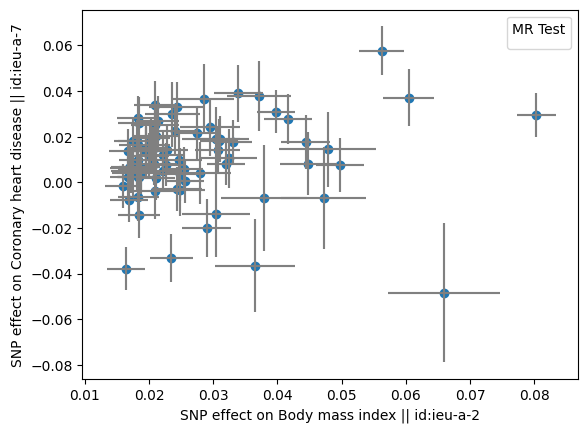

In [8]:
from mr_scatter_plot import *
scatter_plot_result = mr_scatter_plot(result,data)
print (scatter_plot_result)

C:\Users\nkpat\AppData\Roaming\Python\Python39\site-packages\statsmodels\regression\linear_model.py:921: ValueWarning: Weights are not supported in OLS and will be ignoredAn exception will be raised in the next version.
  warnings.warn(msg, ValueWarning)
C:\Users\nkpat\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['weights']
  warnings.warn(msg, ValueWarning)
C:\Users\nkpat\Desktop\MR\mr_egger_regression.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[x == 0] = 1
C:\Users\nkpat\Desktop\MR\mr_egger_regression.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

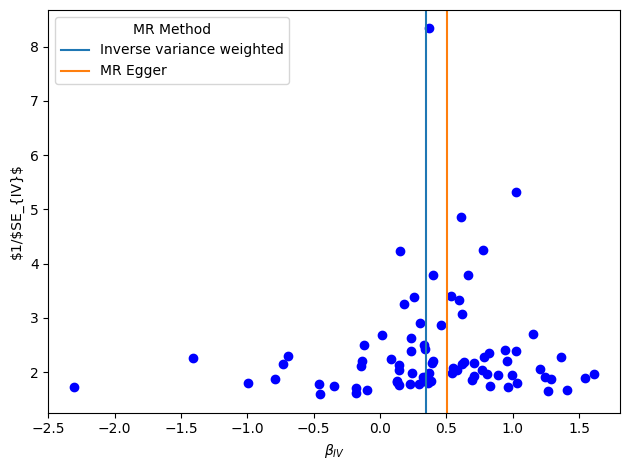

None


In [10]:
from mr_funnel_plot import *
res = mr_singlesnp(data)
plt = mr_funnel_plot(res)
print (plt)

c:\Users\nkpat\Desktop\MR\mr_forest_plot.py:59: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  res = singlesnp_results.groupby(["id.exposure", "id.outcome"]).apply(lambda d:
c:\Users\nkpat\Desktop\MR\mr_forest_plot.py:72: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  res = res.groupby(["id.exposu

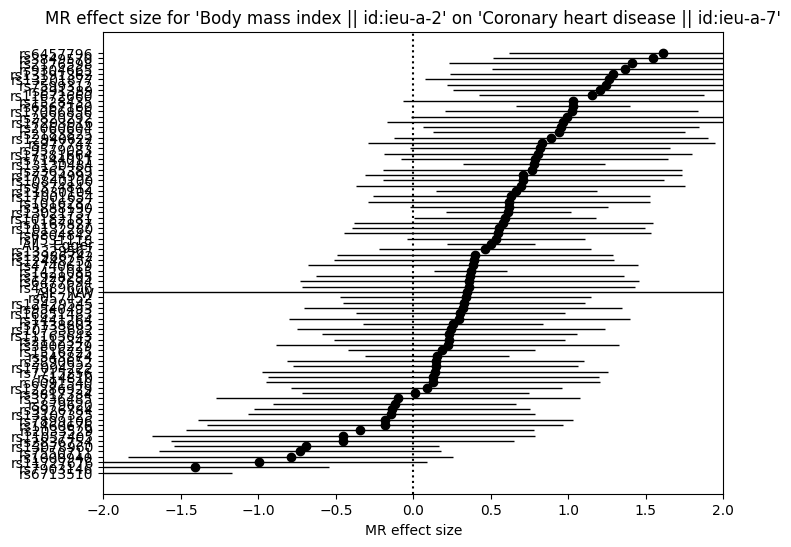

None


In [2]:
from mr_forest_plot import *
forest_plt = mr_forest_plot(res)
print (forest_plt)

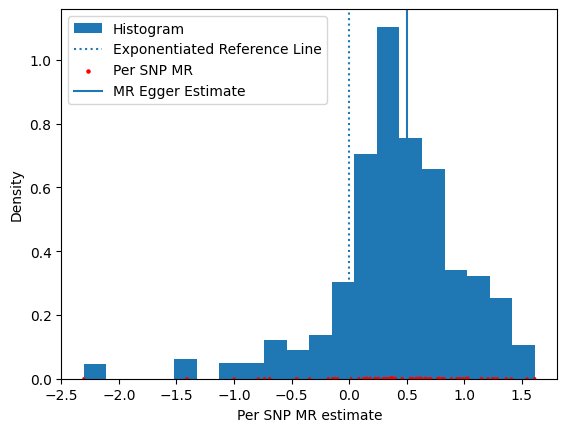

In [4]:
from mr_density_plot import *
density_plt = mr_density_plot(res, result)